### Libraries Used:
- Pandas for data wrangling
- Numpy for effcient computations
- Seaborn for Visualization
- NBA API as our data source

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from nba_api.stats.endpoints import playercareerstats, leaguegamefinder
from nba_api.stats.static import teams, players

sns.set_theme()

### Tables
- Knick members
- Knick Season stats
- Knick Player stats

In [ ]:
# EXTRACT
nba_teams = teams.get_teams()
team_df = pd.DataFrame(nba_teams)

Knicks games from the current 2025 - 2026 season

In [ ]:
# EXTRACT
knicks_id = team_df.loc[team_df['abbreviation'] == 'NYK','id']
knicks_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=knicks_id)
knicks_games_df = knicks_games.get_data_frames()[0]
# TRANSFORM
current_season = '22025'
games_columns = ['SEASON_ID','TEAM_NAME','GAME_DATE','MATCHUP','WL','PTS','PLUS_MINUS']
current_season_knicks_games = knicks_games_df[games_columns].loc[knicks_games_df['SEASON_ID'] == current_season,:]
current_season_knicks_games_wins = current_season_knicks_games.loc[current_season_knicks_games['WL']== 'W',:]
current_season_knicks_games_losses = current_season_knicks_games.loc[current_season_knicks_games['WL']== 'L',:]
# VISUALIZE
#print(current_season_knicks_games)


Knicks current members

In [8]:
knicks_active_players = [
    'Jalen Brunson','Josh Hart','Karl-Anthony Towns',
    'OG Anunoby','Jordan Clarkson','Mikal Bridges',
    'Tyler Kolek','Mitchell Robinson', 'Miles McBride',
    'Landry Shamet','Mohamed Diawara', 'Ariel Hukporti',
    'Pacôme Dadiet','Jose Alvarado', 'Dillon Jones',
    'Kevin McCullar Jr.','Trey Jemison III'
    ]
# EXTRACT
players_list = players.get_players()
players_df = pd.DataFrame(players_list)
# TRANSFORM
kp_columns = ['id','full_name','is_active','team','season_started']
knicks_players = players_df.loc[players_df['full_name'].isin(knicks_active_players),:]
knicks_players = knicks_players.assign(team = 'NYK')
knicks_players = knicks_players.assign(season_started = 'N/A')
# VISUALIZE
print(knicks_players[kp_columns])

           id           full_name  is_active team season_started
77    1630631       Jose Alvarado       True  NYK            N/A
122   1628384          OG Anunoby       True  NYK            N/A
514   1628969       Mikal Bridges       True  NYK            N/A
591   1628973       Jalen Brunson       True  NYK            N/A
813    203903     Jordan Clarkson       True  NYK            N/A
985   1642359       Pacôme Dadiet       True  NYK            N/A
1112  1642885     Mohamed Diawara       True  NYK            N/A
1873  1628404           Josh Hart       True  NYK            N/A
2092  1630574      Ariel Hukporti       True  NYK            N/A
2221  1641998    Trey Jemison III       True  NYK            N/A
2335  1641794        Dillon Jones      False  NYK            N/A
2524  1642278         Tyler Kolek       True  NYK            N/A
2913  1630540       Miles McBride       True  NYK            N/A
2948  1641755  Kevin McCullar Jr.       True  NYK            N/A
3858  1629011   Mitchell 

Jalen Brunson's stats

   PLAYER_ID           NAME SEASON_ID TEAM_ABBREVIATION  PLAYER_AGE  FG_PCT  \
4    1628973  Jalen Brunson   2022-23               NYK        26.0   0.491   
5    1628973  Jalen Brunson   2023-24               NYK        27.0   0.479   
6    1628973  Jalen Brunson   2024-25               NYK        28.0   0.487   
7    1628973  Jalen Brunson   2025-26               NYK        29.0   0.470   

   FG3_PCT  REB  AST  
4    0.416  241  421  
5    0.401  278  519  
6    0.383  187  475  
7    0.374  166  305  


<Axes: xlabel='SEASON_ID', ylabel='FG_PCT'>

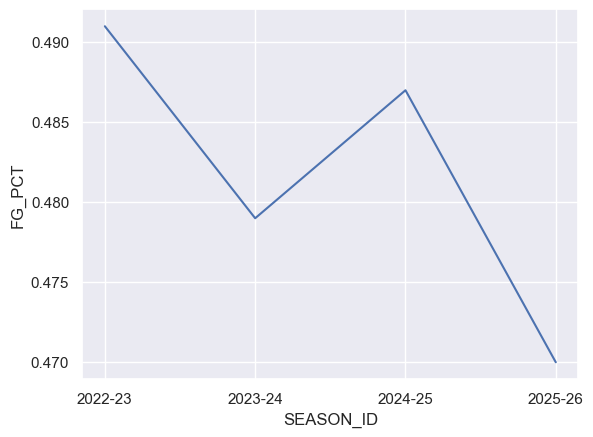

In [12]:
# EXTRACT
Brunson_id = knicks_players['id'].loc[knicks_players['last_name'] == 'Brunson']
Brunson = playercareerstats.PlayerCareerStats(player_id= Brunson_id)
Brunson_stats = Brunson.season_totals_regular_season.get_data_frame()
# TRANSFORM
Brunson_NYK_stats = Brunson_stats.loc[Brunson_stats['TEAM_ABBREVIATION'] == 'NYK']
Brunson_NYK_stats = Brunson_NYK_stats.assign(NAME = 'Jalen Brunson')
stats_columns = ['PLAYER_ID','NAME','SEASON_ID','TEAM_ABBREVIATION','PLAYER_AGE','FG_PCT','FG3_PCT','REB','AST']
# VISUALIZE
print(Brunson_NYK_stats[stats_columns])
sns.lineplot(
    data=Brunson_NYK_stats,
    x='SEASON_ID',
    y= 'FG_PCT',
)

Josh Hart's stats

In [ ]:
# EXTRACT
Hart_id = knicks_players['id'].loc[knicks_players['last_name'] == 'Hart']
Hart = playercareerstats.PlayerCareerStats(player_id= Hart_id)
Hart_stats = Hart.season_totals_regular_season.get_data_frame()
#TRANSFORM
Hart_NYK_stats = Hart_stats.loc[Hart_stats['TEAM_ABBREVIATION'] == 'NYK']
# VISUALIZE
sns.lineplot(
    data=Hart_NYK_stats,
    x='SEASON_ID',
    y= 'FG_PCT',
)

KAT's stats

In [ ]:
#EXTRACT
Towns_id = knicks_players['id'].loc[knicks_players['last_name'] == 'Towns']
Towns = playercareerstats.PlayerCareerStats(player_id= Towns_id)
Towns_stats = Towns.season_totals_regular_season.get_data_frame()
# TRANSFORM
Towns_NYK_stats = Towns_stats.loc[Towns_stats['TEAM_ABBREVIATION'] == 'NYK']
#VISAULIZE
sns.lineplot(
    data=Towns_NYK_stats,
    x='SEASON_ID',
    y= 'FG_PCT',
)

Knick players stats

In [36]:
knicks_player_id = [ knicks_players['id'].loc[knicks_players['full_name'] == player] for player in knicks_active_players]
knicks_player_id = [id.values[0] for id in knicks_player_id]
Knicks_player_stats_df = pd.DataFrame()


In [ ]:
for player_id in knicks_player_id:
    player_k = playercareerstats.PlayerCareerStats(player_id = player_id)
    player_k_stats = player_k.season_totals_regular_season.get_data_frame()
    player_NYK_stats = player_k_stats.loc[player_k_stats['TEAM_ABBREVIATION'] == 'NYK']
    Knicks_player_stats_df = pd.concat([Knicks_player_stats_df,player_NYK_stats],ignore_index=False)

In [ ]:
print(Knicks_player_stats_df.info())
